## **Final Project - Netflix original programming**
---

This Project is about current and upcoming original series and related specials on Netflix.
We will analyse and visualize trends by answering the following questions:

# Questions
  1. What are the Netflix release years?
  2. What are the most popular genres of shows on Netflix?
  3. What are the top 5 languages of shows on Netflix?
  4. What is the number of shows released in the past 5 years by language?
  5. What is the most popular time to release a show?
  6. What are the shows with the largest number of seasons and episodes?
  7. What is the distribution of average runtime? Which shows have the minimum and the maximum runtime?
  8. What are the top 10 genres of upcoming shows?
  9. what are the top 5 languages of upcoming shows?
  10. What are the top genre of shows in development?

#### Imports and Data loading

In [1]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Netflix programming.csv')

In [3]:
df.head()

,Title,Genre,Premiere,Seasons,Runtime,Status,Language
0,Stranger Things,Science fiction horror,"July 15, 2016","4 seasons, 34 episodes",42–150 min,Final season due to premiere in 2025[1],English
1,Virgin River,Romantic drama,"December 6, 2019","5 seasons, 54 episodes",39–52 min,Season 6 due to premiere in 2025[1][2],English
2,The Witcher,Fantasy drama,"December 20, 2019","3 seasons, 24 episodes",47–67 min,Renewed for seasons 4–5 (final)[3][4],English
3,Outer Banks,Coming-of-age drama,"April 15, 2020","3 seasons, 30 episodes",42–79 min,"Season 4 part 1 due to premiere on October 10,...",English
4,Sweet Magnolias,Romantic drama,"May 19, 2020","3 seasons, 30 episodes",43–54 min,Season 4 due to premiere in 2025[1][8],English


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     619 non-null    object
 1   Genre     619 non-null    object
 2   Premiere  619 non-null    object
 3   Seasons   619 non-null    object
 4   Runtime   619 non-null    object
 5   Status    619 non-null    object
 6   Language  627 non-null    object
dtypes: object(7)
memory usage: 34.7+ KB


In [6]:
# Remove all square brackets including content inside
def remove_square_brackets(text):
    if isinstance(text, str):
        return re.sub(r'\[.*?\]', '', text).strip()
    return text

df = df.applymap(remove_square_brackets)

C:\Users\Alda\AppData\Local\Temp\ipykernel_16076\4253420779.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(remove_square_brackets)


In [7]:
# Look for missing values
df.isna().sum()

Title       14
Genre       14
Premiere    14
Seasons     14
Runtime     14
Status      14
Language     6
dtype: int64

In [8]:
#Droping missing values cause containing only 'None' in all columns of the row
df = df.dropna()
df

,Title,Genre,Premiere,Seasons,Runtime,Status,Language
0,Stranger Things,Science fiction horror,"July 15, 2016","4 seasons, 34 episodes",42–150 min,Final season due to premiere in 2025,English
1,Virgin River,Romantic drama,"December 6, 2019","5 seasons, 54 episodes",39–52 min,Season 6 due to premiere in 2025,English
2,The Witcher,Fantasy drama,"December 20, 2019","3 seasons, 24 episodes",47–67 min,Renewed for seasons 4–5 (final),English
3,Outer Banks,Coming-of-age drama,"April 15, 2020","3 seasons, 30 episodes",42–79 min,"Season 4 part 1 due to premiere on October 10,...",English
4,Sweet Magnolias,Romantic drama,"May 19, 2020","3 seasons, 30 episodes",43–54 min,Season 4 due to premiere in 2025,English
...,...,...,...,...,...,...,...
628,Untitled spiritual procedural series,Crime procedural/Supernatural,Unknown,Unknown,Unknown,In development,English
629,Untitled Stranger Things spin-off series,Science fiction drama,Unknown,Unknown,Unknown,In development,English
630,Untitled U2 biopic series,Biopic,Unknown,Unknown,Unknown,In development,English
631,Untitled Virgin River prequel,Romantic drama,Unknown,Unknown,Unknown,In development,English


In [9]:
# Let create a release year column 
from datetime import datetime

# First we define a function to extract the year from the Premiere column:
def extract_year(date_str):
    if date_str == 'Unknown':
        return None
    try:
        # Convert the date string to a datetime object
        date_obj = datetime.strptime(date_str, '%B %d, %Y')
        return date_obj.year
    except ValueError:
        # Handle cases where the format is unexpected or missing
        return None

# We apply the function to the Premiere column to create the release_year column
df['Release_year'] = df['Premiere'].apply(extract_year).astype('Int64') 

In [10]:
df['Release_year'].value_counts()

Release_year
2024    144
2023    105
2022     41
2020     18
2021     16
2019      8
2018      5
2016      2
2017      1
Name: count, dtype: Int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 0 to 632
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         619 non-null    object
 1   Genre         619 non-null    object
 2   Premiere      619 non-null    object
 3   Seasons       619 non-null    object
 4   Runtime       619 non-null    object
 5   Status        619 non-null    object
 6   Language      619 non-null    object
 7   Release_year  340 non-null    Int64 
dtypes: Int64(1), object(7)
memory usage: 44.1+ KB


In [13]:
df["Genre"].value_counts()

Genre
Drama                      54
Comedy                     34
Crime drama                28
Sports                     24
Reality                    23
                           ..
Romantic mystery comedy     1
Horror anthology            1
Romantic comedy drama       1
Toy industry                1
Science fiction drama       1
Name: count, Length: 207, dtype: int64

In [14]:
# Rename the Column "Seasons" to "Seasons&Total episodes" in order to create 2 columns 'Seasons' and 'Total episodes'
df.rename(columns={'Seasons': 'Seasons&Total episodes'},
          inplace=True, errors='raise')

In [15]:
# Function to extract the number of episodes
def extract_episodes(seasons_str):
    # Find all numbers in the string
    episodes = re.findall(r'(\d+)', seasons_str)
    # If there are any numbers, return the last one (episodes count)
    return int(episodes[-1]) if episodes else None

# Function to extract the number of seasons
def extract_seasons(seasons_str):
    # Find all numbers in the string
    seasons = re.findall(r'(\d+)', seasons_str)
    # If there are any numbers, return the first one (seasons count)
    return int(seasons[0]) if seasons else None

# Create the 'Total episodes' column
df['Total episodes'] = df['Seasons&Total episodes'].apply(extract_episodes).astype('Int64') 

# Create the 'Seasons' column
df['Seasons'] = df['Seasons&Total episodes'].apply(extract_seasons).astype('Int64') 


In [16]:
df.head()

,Title,Genre,Premiere,Seasons&Total episodes,Runtime,Status,Language,Release_year,Total episodes,Seasons
0,Stranger Things,Science fiction horror,"July 15, 2016","4 seasons, 34 episodes",42–150 min,Final season due to premiere in 2025,English,2016,34,4
1,Virgin River,Romantic drama,"December 6, 2019","5 seasons, 54 episodes",39–52 min,Season 6 due to premiere in 2025,English,2019,54,5
2,The Witcher,Fantasy drama,"December 20, 2019","3 seasons, 24 episodes",47–67 min,Renewed for seasons 4–5 (final),English,2019,24,3
3,Outer Banks,Coming-of-age drama,"April 15, 2020","3 seasons, 30 episodes",42–79 min,"Season 4 part 1 due to premiere on October 10,...",English,2020,30,3
4,Sweet Magnolias,Romantic drama,"May 19, 2020","3 seasons, 30 episodes",43–54 min,Season 4 due to premiere in 2025,English,2020,30,3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 0 to 632
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   619 non-null    object
 1   Genre                   619 non-null    object
 2   Premiere                619 non-null    object
 3   Seasons&Total episodes  619 non-null    object
 4   Runtime                 619 non-null    object
 5   Status                  619 non-null    object
 6   Language                619 non-null    object
 7   Release_year            340 non-null    Int64 
 8   Total episodes          322 non-null    Int64 
 9   Seasons                 322 non-null    Int64 
dtypes: Int64(3), object(7)
memory usage: 55.0+ KB


## Exploratory Analysis and Visualization

Let's analyse and visualise relationships and connections between different columns to get interesting insights from our dataset

#### Netflix Release years

In [18]:
df["Release_year"].value_counts()

Release_year
2024    144
2023    105
2022     41
2020     18
2021     16
2019      8
2018      5
2016      2
2017      1
Name: count, dtype: Int64

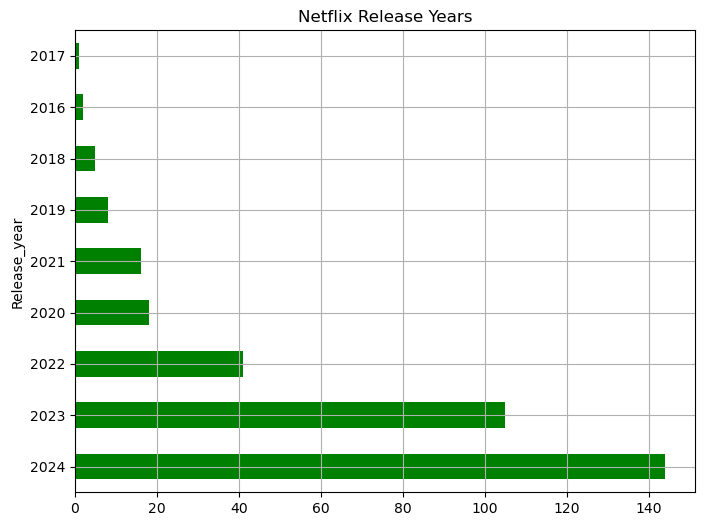

In [19]:
plt.title('Netflix Release Years')
df["Release_year"].value_counts().plot.barh(figsize=(8,6), color="green")
plt.grid(True)
plt.show()

The distribution of release years indicates a recent surge in TV series production or planning, with a marked increase in the past few years and a noticeable decrease for older years. The presence of many series listed as "In development" might also influence future counts as more data becomes available.

## What is the top 10 genres of shows on Netflix?

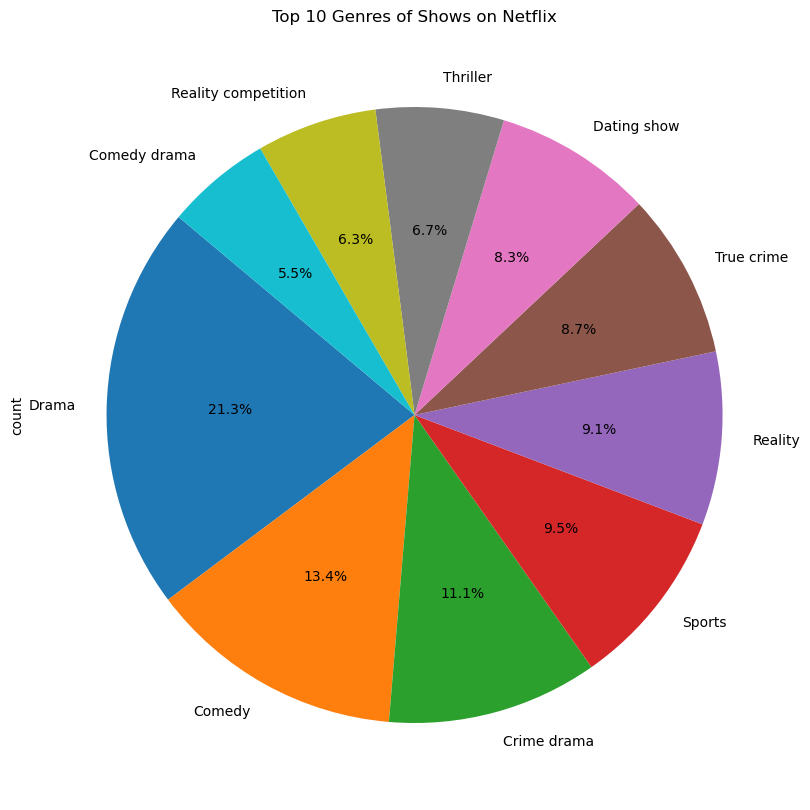

In [20]:
# Get the top 10 genres by count
top10_genres = df['Genre'].value_counts().head(10)

# Pie chart
plt.figure(figsize=(10, 10))
plt.title('Top 10 Genres of Shows on Netflix')
top10_genres.plot.pie(autopct='%1.1f%%', startangle=140)

plt.show()

We can notice that drama is the most prevalent genre among the top 10, with 21.1%, making it the largest segment of the pie chart. This indicates a strong preference or production focus on dramatic content. Drame clearly leads, followed by Comedy with 13.8% and crime-related genres, followed by a range of other genres that cater to different tastes and interests. This can provide insights into current viewing trends and audience preferences.

## What is the top 5 Languages of shows on Netflix?

First, let's see the distribution of languages

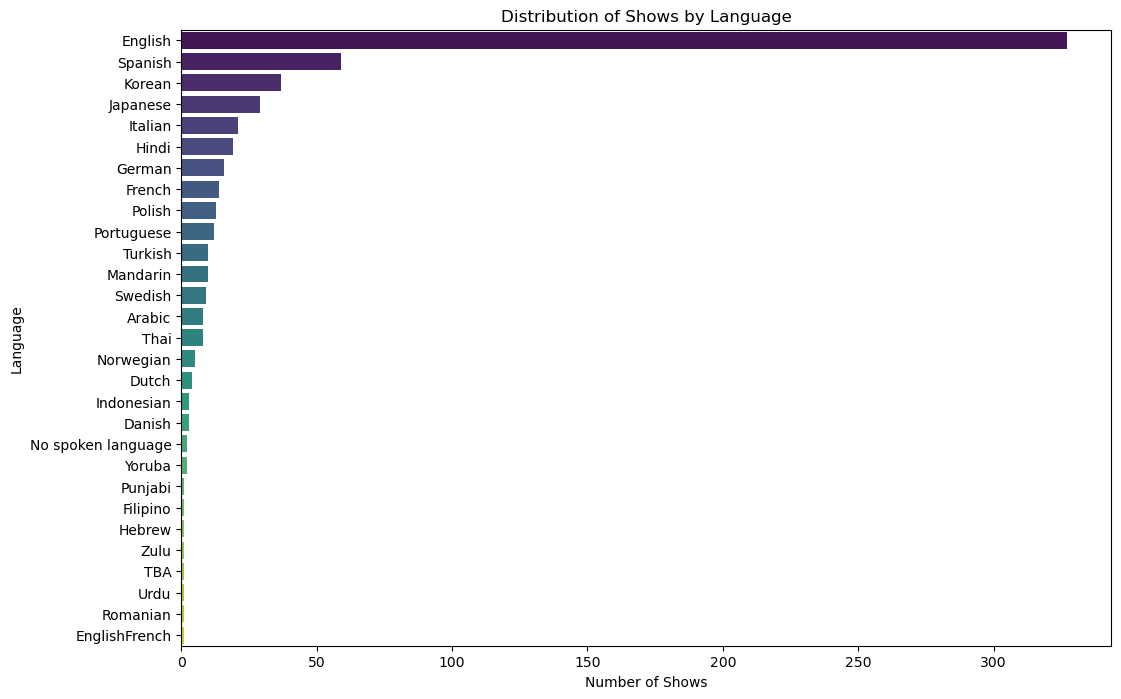

In [21]:
# Plot distribution of languages
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Language', order=df['Language'].value_counts().index, palette='viridis')
plt.title('Distribution of Shows by Language')
plt.xlabel('Number of Shows')
plt.ylabel('Language')
plt.show()

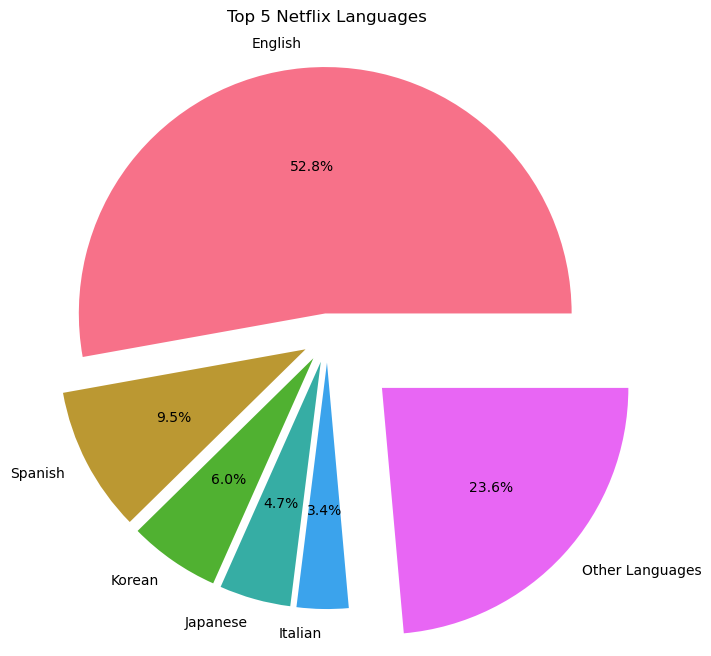

In [22]:
# Calculate the top 5 languages and combine others into "Other Languages"
top_5_languages = df['Language'].value_counts().nlargest(n=5)
other_languages = df['Language'].value_counts().sum() - top_5_languages.sum()
top_5_languages['Other Languages'] = other_languages

# Prepare explode parameter to highlight the 'Other Languages' slice
explode = [0.1] * len(top_5_languages)
explode[-1] = 0.3  # Increase explode value for 'Other Languages' slice


# Plot pie chart
plt.figure(figsize=(8,6))
plt.title('Top 5 Netflix Languages')
colors = sns.color_palette("husl", len(top_5_languages))
top_5_languages.plot.pie(autopct='%1.1f%%', figsize=(10, 8), colors=colors,explode=explode)
plt.ylabel('')
plt.show()

We can notice that more than the half of the shows are in English (53%). English is the predominant language for shows in our dataset, followed by Spanish, Korean, Japanese and Italian. 

## What is the number of shows released in the past 5 years by Language?

In [23]:
# Get the current year
current_year = datetime.now().year #2024

# Filter for the past 5 years
past_5_years_df = df[df['Release_year'] >= (current_year - 5)] #2024-2019

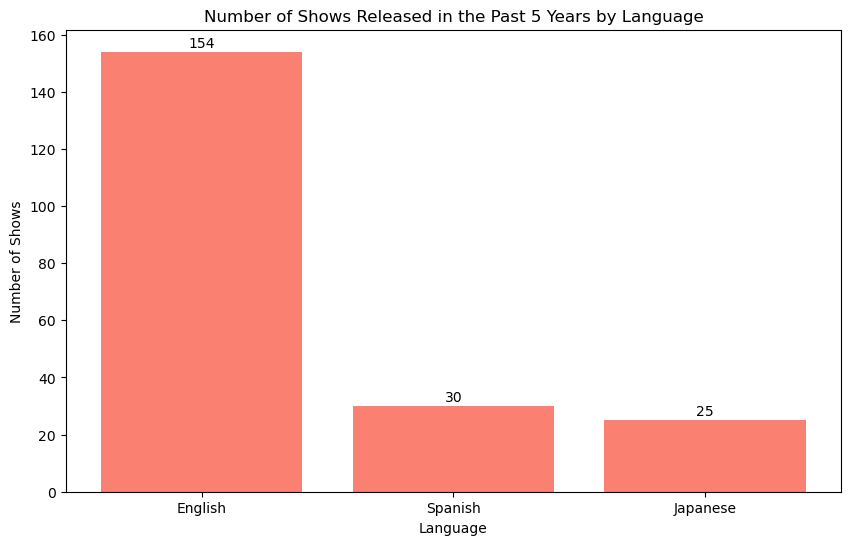

In [24]:
# Find the top 3 languages by the number of shows

top_languages = past_5_years_df['Language'].value_counts().head(3).index
# Filter the DataFrame to include only the top 3 languages
top_languages_df = past_5_years_df[past_5_years_df['Language'].isin(top_languages)]
# Count the number of shows per language
language_counts = top_languages_df['Language'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(language_counts.index, language_counts.values, color='salmon')

# Annotate each bar with the number of shows
for bar, count in zip(bars, language_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, 
             f'{count}', va='bottom', ha='center', fontsize=10, color='black')

plt.xlabel('Language')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released in the Past 5 Years by Language')
plt.show()

The number of shows released in the past 5 years highlights a strong dominance of English-language content, with Spanish and Japanese content also contributing but at lower levels. This distribution reflects ongoing trends in global TV production and consumption, where English remains the leading language but other languages are gaining ground and diversifying the media landscape

## What is the most popular time to release a show?

In [25]:
# Parsing the Dates
netflix_date = df[['Premiere']].dropna()
netflix_date['year'] = netflix_date['Premiere'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['Premiere'].apply(lambda x : x.lstrip().split(' ')[0])

# Adding the Months and Grouping 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df1 = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Create the new '2024' column
df1['2024'] = df1[['2024', 'Late 2024', 'December 2024', 'November 2024', 'October 2024']].sum(axis=1)

# Drop the old columns
df1 = df1.drop(columns=['2025','2026','Late 2024', 'December 2024', 'November 2024', 'October 2024', 'Early 2025', 'Mid-2025', 'TBA', 'Unknown'])

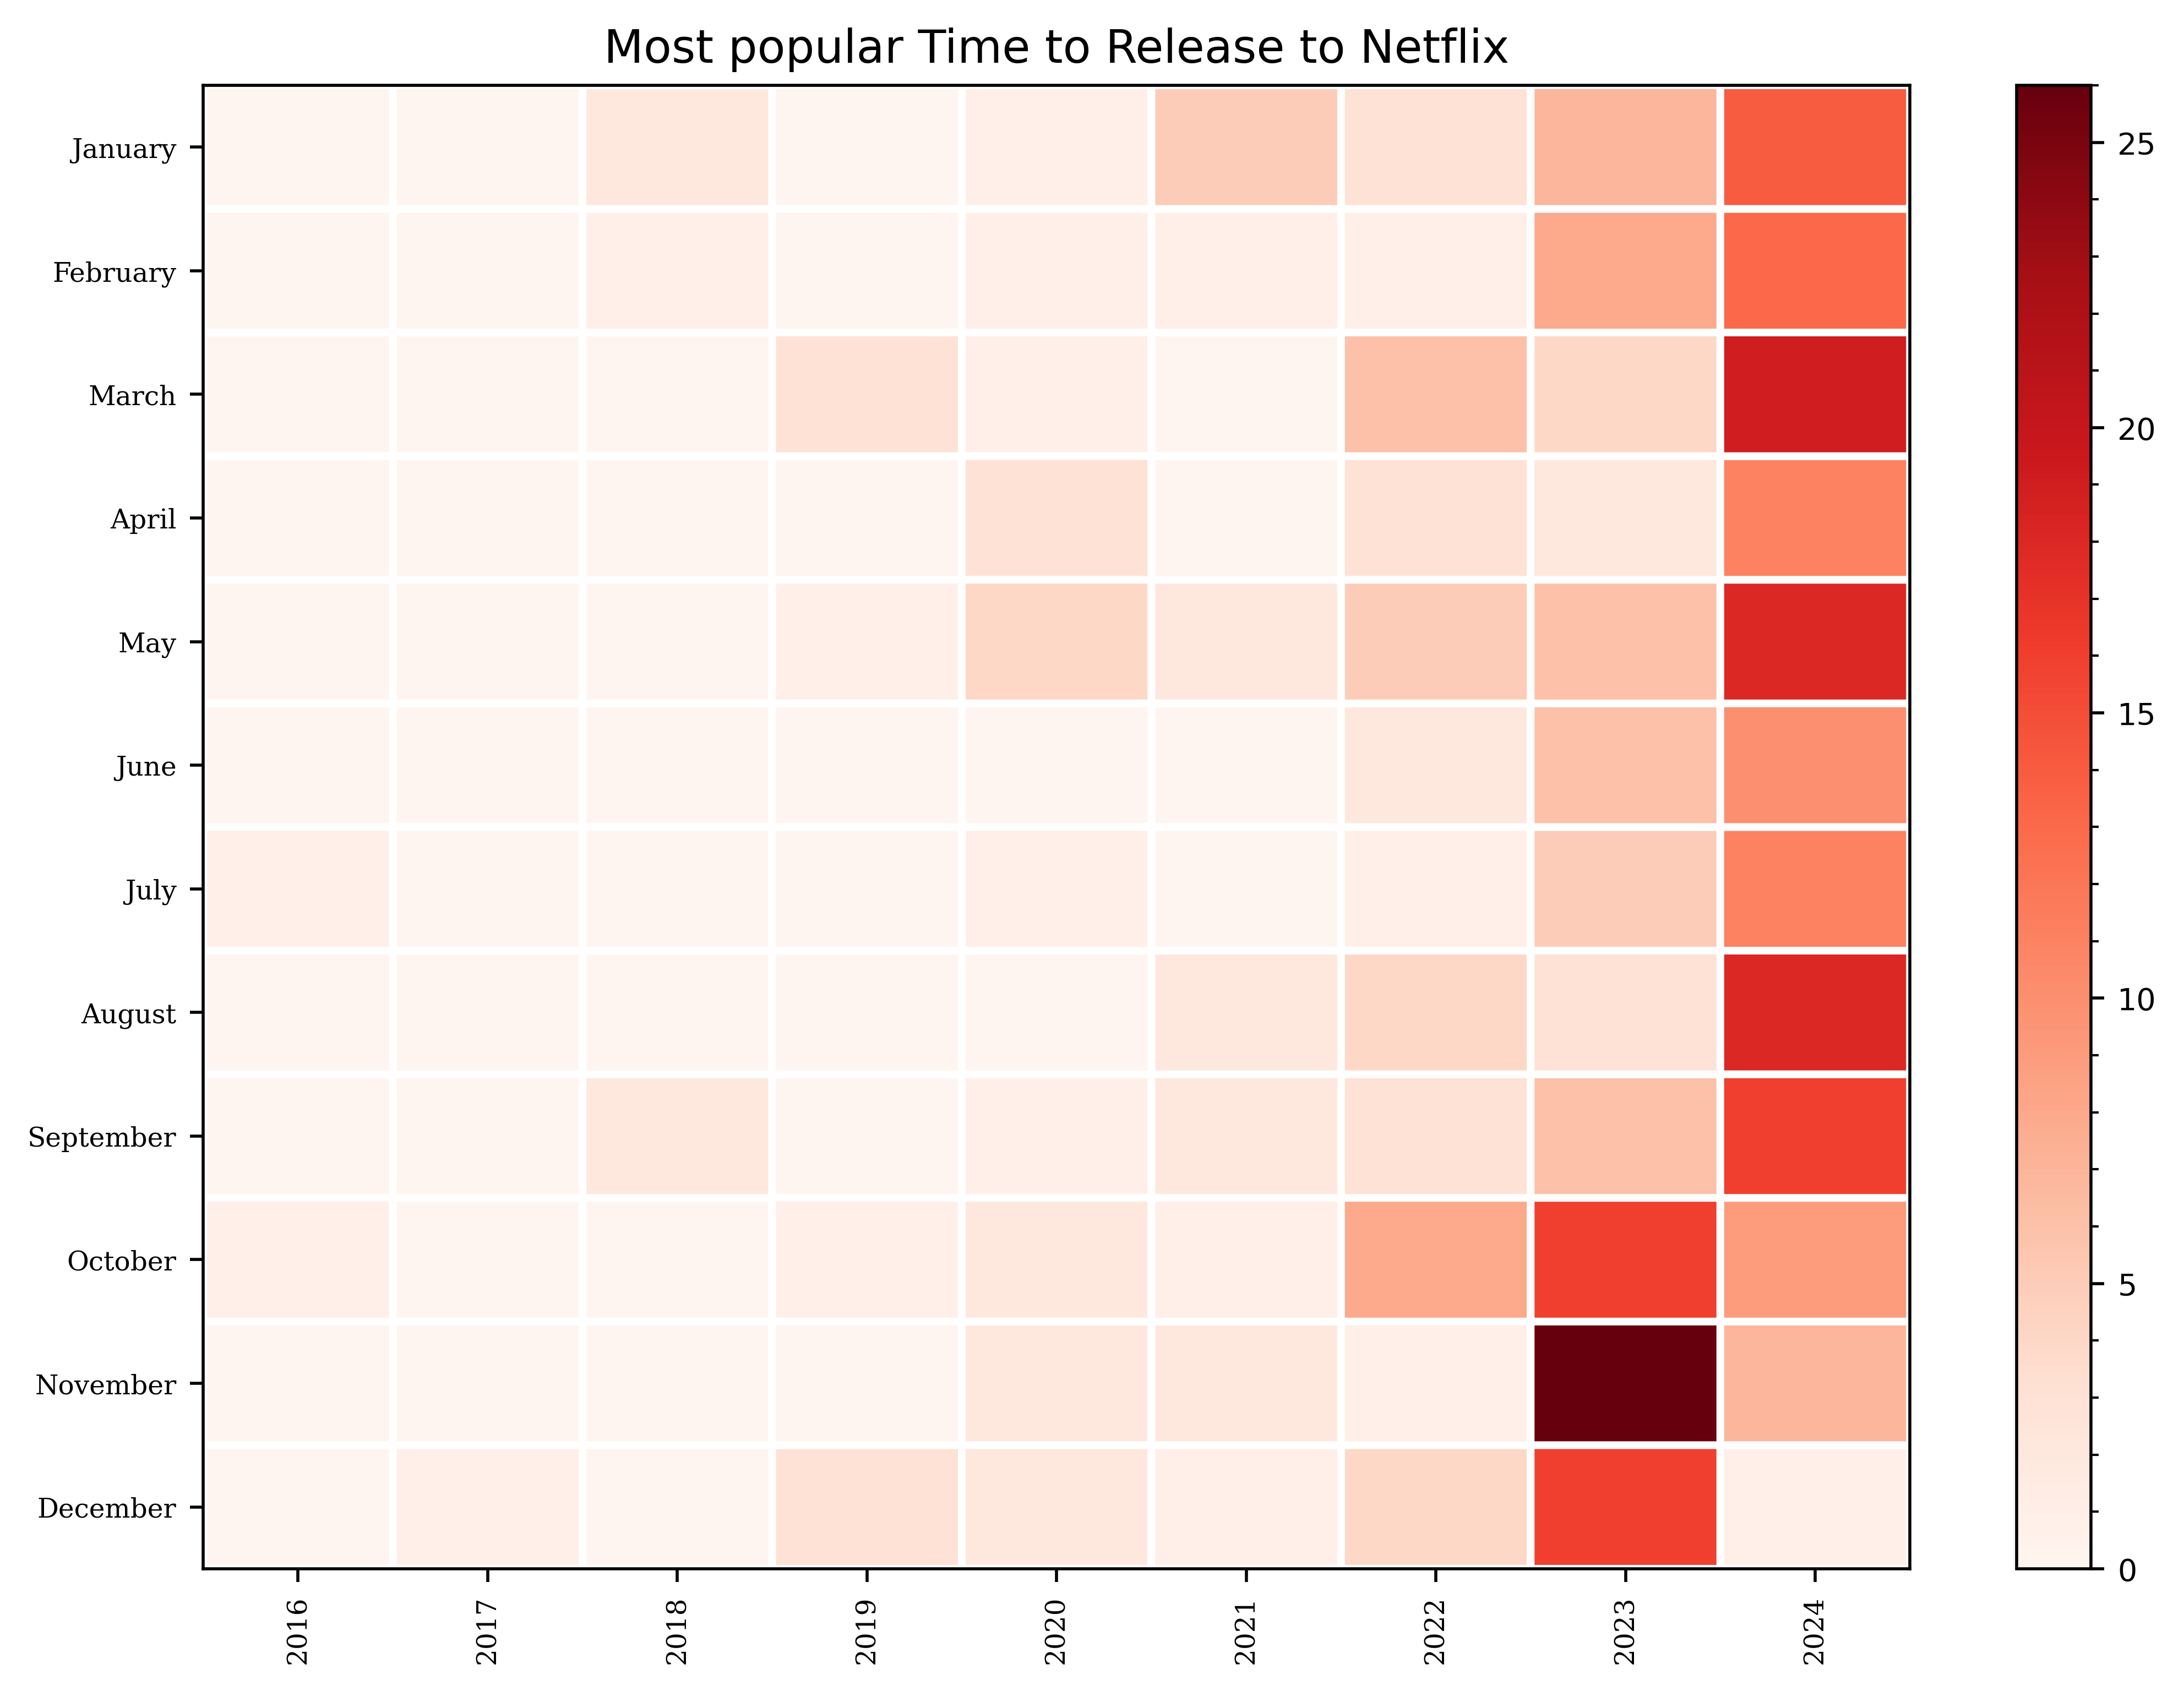

In [26]:
# Customizing the figure design
plt.figure(figsize=(10, 7), dpi=500)
plt.pcolor(df1, cmap='Reds', edgecolors='white', linewidths=2) # heatmap

# Adding y and x ticks
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns, fontsize=7, fontfamily='serif',rotation=90)
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index, fontsize=7, fontfamily='serif')

# Adding the Title
plt.title('Most popular Time to Release to Netflix', fontsize=12, position=(0.50, 1.0+0.02))

# Adding the Colorbar
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

This heatmap shows the most popular time to release to Netflix, I.E Month and Year. In 2023 November was the best month, in 2024 most movies were released in August, May and March.

## What are the shows with the largest number of seasons and episodes?

#### First we focus on the number of seasons

In [27]:
# Sort the DataFrame by the 'Seasons' column in descending order
sorted_df = df.sort_values(by='Seasons', ascending=False)

# Display the shows with the largest number of seasons
sorted_df[['Title', 'Seasons']]

,Title,Seasons
68,Gabby's Dollhouse,10
263,Queer Eye,8
88,Barbie Mysteries: The Great Horse Chase,8
102,Murder Mindfully,8
24,The Madness,8
...,...,...
628,Untitled spiritual procedural series,<NA>
629,Untitled Stranger Things spin-off series,<NA>
630,Untitled U2 biopic series,<NA>
631,Untitled Virgin River prequel,<NA>


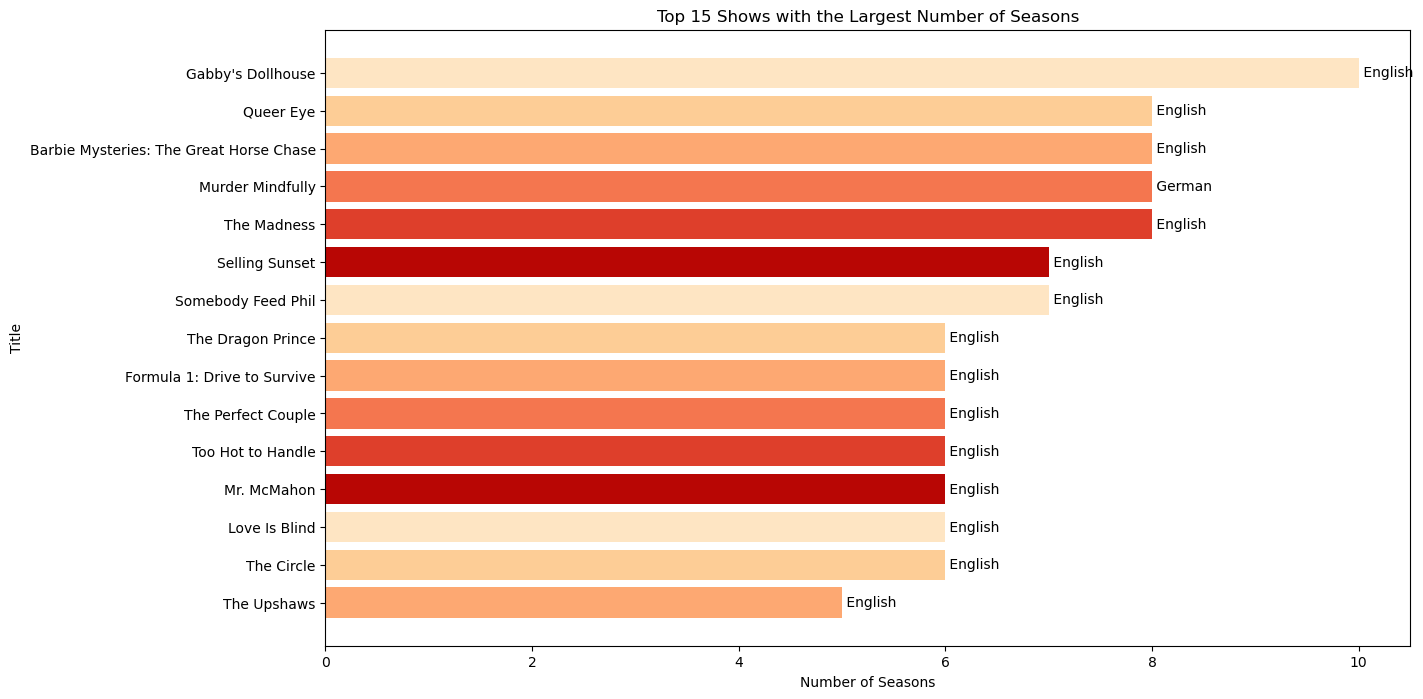

In [28]:
# Sort the DataFrame by the 'Seasons' column in descending order
sorted_df = df.sort_values(by='Seasons', ascending=False)

# Select the top 15 rows
top_15_df = sorted_df.head(15)

# Plot the data
plt.figure(figsize=(14, 8))
colors = sns.color_palette('OrRd')[0:11]
bars = plt.barh(top_15_df['Title'], top_15_df['Seasons'], color=colors)

# Annotate each bar with the language information
for bar, language in zip(bars, top_15_df['Language']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {language}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Number of Seasons')
plt.ylabel('Title')
plt.title('Top 15 Shows with the Largest Number of Seasons')

# Display the plot
plt.gca().invert_yaxis()
plt.show()

Gabby’s Dollhouse is the show with the highest number of seasons, totaling 10. This indicates its significant longevity and sustained popularity or success. It is followed by several shows with 8 seasons, a few with 7, and a majority with 6 seasons. This distribution highlights both the long-term success of some series and the commonality of a 6-season run as a marker of successful shows.

#### We do the same thing with the number of episodes

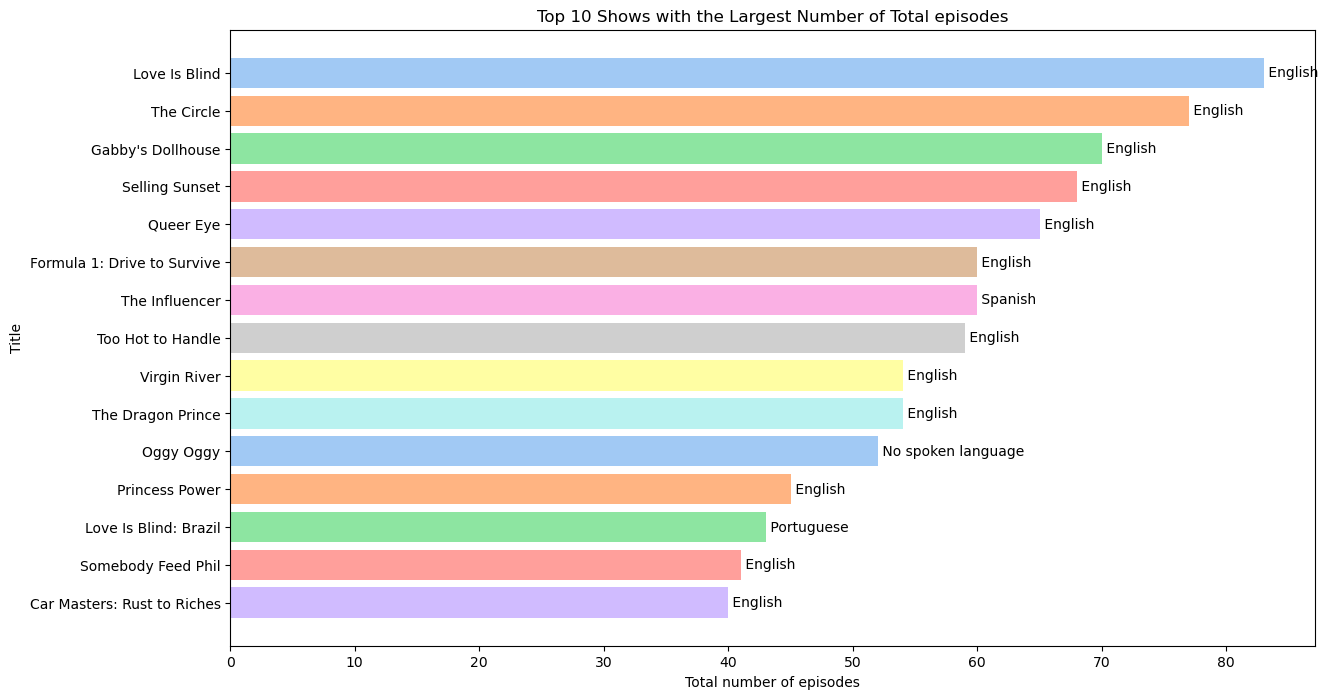

In [30]:
# Sort the DataFrame by the 'Total episode' column in descending order
sorted_df = df.sort_values(by='Total episodes', ascending=False)

# Select the top 15 rows
top_10_df = sorted_df.head(15)

# Plot the data
plt.figure(figsize=(14, 8))
colors = sns.color_palette('pastel')[0:11]
bars = plt.barh(top_10_df['Title'], top_10_df['Total episodes'], color=colors)

# Annotate each bar with the language information
for bar, language in zip(bars, top_10_df['Language']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {language}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Total number of episodes')
plt.ylabel('Title')
plt.title('Top 10 Shows with the Largest Number of Total episodes')

# Display the plot
plt.gca().invert_yaxis()
plt.show()

The top 10 shows with the largest number of episodes demonstrate a range of episode counts from 40 to 83. Shows like "Love Is Blind" and "The Circle" lead with the highest episode counts, indicating their extensive content and viewer engagement. This list highlights the longevity and success of these shows and provides insights into the potential factors contributing to their high episode numbers.

## Now let's focus on runtime

In this part we are going to see the distribution of Average Runtime, which shows have the minimum or the maximum runtime

In [31]:
# df['Release_year'] = df['Release_year'].fillna('Unknown')
# df['Total episodes'] = df['Total episodes'].fillna('Unknown')
# df['Seasons'] = df['Seasons'].fillna('Unknown')

Since we have a 'Runtime' column with minimum and maximum runtime in it, we are going to create 2 columns: Runtime_min and Runtime_max

First we extract minimum runtime and put it in the Runtime_min column

In [32]:
# We extract the minimum value from the runtime range
def extract_min_runtime(runtime_str):
    if 'Unknown' in runtime_str:
        return np.nan
    match = re.search(r'(\d+)–', runtime_str)
    if match:
        return int(match.group(1))
    # Handle cases with only a single value
    match = re.search(r'(\d+) min', runtime_str)
    if match:
        return int(match.group(1))
    return np.nan

df['Runtime_min (min)'] = df['Runtime'].apply(extract_min_runtime)

# Drop rows where runtime is NaN
df_cleaned = df.dropna(subset=['Total episodes', 'Runtime'])

In [33]:
df.head()

,Title,Genre,Premiere,Seasons&Total episodes,Runtime,Status,Language,Release_year,Total episodes,Seasons,Runtime_min (min)
0,Stranger Things,Science fiction horror,"July 15, 2016","4 seasons, 34 episodes",42–150 min,Final season due to premiere in 2025,English,2016,34,4,42.0
1,Virgin River,Romantic drama,"December 6, 2019","5 seasons, 54 episodes",39–52 min,Season 6 due to premiere in 2025,English,2019,54,5,39.0
2,The Witcher,Fantasy drama,"December 20, 2019","3 seasons, 24 episodes",47–67 min,Renewed for seasons 4–5 (final),English,2019,24,3,47.0
3,Outer Banks,Coming-of-age drama,"April 15, 2020","3 seasons, 30 episodes",42–79 min,"Season 4 part 1 due to premiere on October 10,...",English,2020,30,3,42.0
4,Sweet Magnolias,Romantic drama,"May 19, 2020","3 seasons, 30 episodes",43–54 min,Season 4 due to premiere in 2025,English,2020,30,3,43.0


In [34]:
df['Runtime_min (min)'].unique()

array([ 42.,  39.,  47.,  43.,  52.,  37.,  45.,  44.,  50.,  38.,  26.,
        46.,  nan,  24.,  22.,  21.,  20.,  31.,  19.,  41.,  18.,  30.,
        49.,  28.,  56.,  23.,  25.,  14.,  32.,  27.,  13.,  48.,  40.,
        51.,  36.,  29.,  57.,  58.,  53.,  54.,  64.,  35.,  34.,  55.,
        63.,  33.,  81.,  59., 115.,  61.,  11.,  10.])

We do the same thing with the maximum runtime, we extract maximum runtime and put it in the Runtime_max column

In [35]:
# Function to extract the maximum value from the runtime range
def extract_max_runtime(runtime_str):
    if 'Unknown' in runtime_str:
        return np.nan
    match = re.search(r'–(\d+)', runtime_str)
    if match:
        return int(match.group(1))
    # Handle cases with only a single value
    match = re.search(r'(\d+) min', runtime_str)
    if match:
        return int(match.group(1))
    return np.nan

df['Runtime_max (min)'] = df['Runtime'].apply(extract_max_runtime)

df.head()

,Title,Genre,Premiere,Seasons&Total episodes,Runtime,Status,Language,Release_year,Total episodes,Seasons,Runtime_min (min),Runtime_max (min)
0,Stranger Things,Science fiction horror,"July 15, 2016","4 seasons, 34 episodes",42–150 min,Final season due to premiere in 2025,English,2016,34,4,42.0,150.0
1,Virgin River,Romantic drama,"December 6, 2019","5 seasons, 54 episodes",39–52 min,Season 6 due to premiere in 2025,English,2019,54,5,39.0,52.0
2,The Witcher,Fantasy drama,"December 20, 2019","3 seasons, 24 episodes",47–67 min,Renewed for seasons 4–5 (final),English,2019,24,3,47.0,67.0
3,Outer Banks,Coming-of-age drama,"April 15, 2020","3 seasons, 30 episodes",42–79 min,"Season 4 part 1 due to premiere on October 10,...",English,2020,30,3,42.0,79.0
4,Sweet Magnolias,Romantic drama,"May 19, 2020","3 seasons, 30 episodes",43–54 min,Season 4 due to premiere in 2025,English,2020,30,3,43.0,54.0


#### We now have minimum and maximum values, we can create a column with the average runtime

In [36]:
# Calculate the average of Runtime_min (min) and Runtime_max (min)
df['Average_Runtime (min)'] = df[['Runtime_min (min)', 'Runtime_max (min)']].mean(axis=1)

In [37]:
# We replace NaN values with 'Unknown'
df['Runtime_min (min)'] = df['Runtime_min (min)'].fillna('Unknown')
df['Runtime_max (min)'] = df['Runtime_max (min)'].fillna('Unknown')
df['Average_Runtime (min)'] = df['Average_Runtime (min)'].fillna('Unknown')

### What is the distribution of average runtime? which shows have the minimum and maximum runtime?

In [38]:
# Create copy of df 
df_runtime = df

C:\Users\Alda\anaconda3\Anaconda_new\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


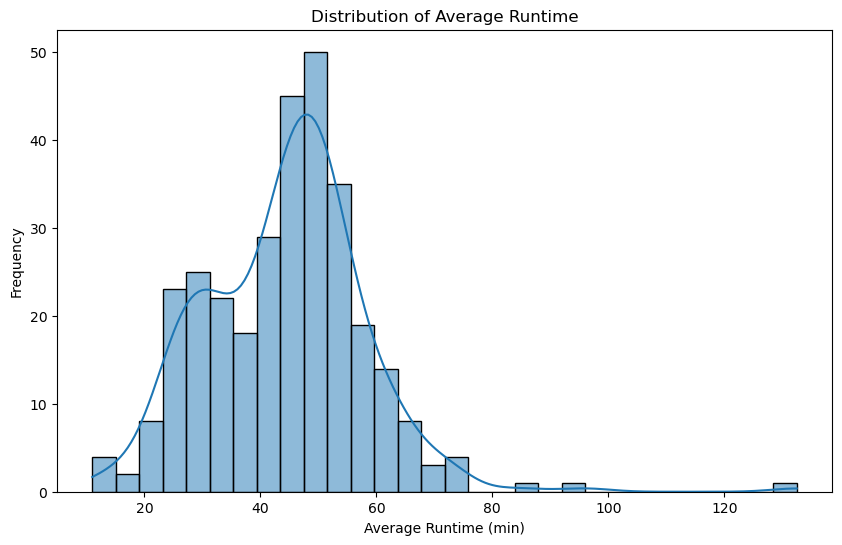

In [52]:
# Plot the distribution of Average Runtime
plt.figure(figsize=(10, 6))
sns.histplot(df_runtime['Average_Runtime (min)'].dropna(), bins=30, kde=True)
plt.title('Distribution of Average Runtime')
plt.xlabel('Average Runtime (min)')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Let's group some genres
genre_mapping = {
    'Science fictionhorror': 'Science fiction',
    'Fantasydrama': 'Fantasy',
    'Coming-of-agedrama': 'Coming-of-Age',
    'Teen drama': 'Teen',
    'Alternate historicalromance': 'Historical',
    'Drama': 'Drama',
    'Legal thriller': 'Thriller',
    'Fantasy': 'Fantasy',
    'Horror': 'Horror',
    'Spyadventure': 'Adventure',
    'Political thriller': 'Thriller',
    'Science fiction': 'Science fiction',
    'Supernatural drama': 'Drama',
    'Superherodrama': 'Drama',
    'Crime drama': 'Drama',
    'Crime dramaminiseries': 'Miniseries',
    'Conspiracy thrillerminiseries': 'Miniseries',
    'Comedy drama': 'Drama',
    'Sitcom': 'Sitcom',
    'Comedy': 'Comedy',
    'Comedy horror': 'Horror',
    'Period teen sitcom': 'Teen',
    'Workplace comedy': 'Comedy',
    'Romance comedy drama': 'Drama',
    'Spy action comedy': 'Comedy',
    'Action comedy': 'Comedy',
    'Thriller comedy drama': 'Thriller',
    'Dark comedy': 'Comedy',
    'Action-adventure': 'Adventure',
    'Fantasy action': 'Action',
    'Dark fantasy': 'Fantasy',
    'Fantasy romantic comedy': 'Comedy',
    'Fantasy adventure': 'Fantasy',
    'Historical fantasy': 'Fantasy',
    'Stop-motion fantasy': 'Fantasy',
    'Dark fantasy anthology': 'Fantasy',
    'Martial arts': 'Sports',
    'Sports': 'Sports',
    'Mecha / military science fiction': 'Science fiction',
    'Fantasy action adventure': 'Fantasy',
    'Preschool adventure fantasy': 'Preschool',
    'Preschool comedy': 'Preschool',
    'Preschool adventure comedy': 'Preschool',
    'Preschool action comedy': 'Preschool',
    'Fantasy musical': 'Fantasy',
    'Preschool fantasy': 'Preschool',
    'Superhero action comedy': 'Superhero',
    'Preschool musical': 'Preschool',
    'Fantasy adventure musical': 'Fantasy',
    'Adventure comedy': 'Adventure',
    'Science fiction action adventure': 'Science fiction',
    'Preschool': 'Preschool',
    'Mystery thriller': 'Thriller',
    'Action': 'Action',
    'Thriller': 'Thriller',
    'Historical drama': 'Historical',
    'Police procedural': 'Police',
    'Romantic comedy': 'Romantic',
    'Romantic thriller': 'Thriller',
    'Teen crime thriller': 'Teen',
    'Crime comedy thriller': 'Comedy',
    'Dark comedy/Crime thriller': 'Thriller',
    'Legal comedy drama': 'Drama',
    'Period drama': 'Drama',
    'Science fiction anthology': 'Science fiction',
    'Coming-of-age': 'Coming-of-Age',
    'Period legal drama': 'Drama',
    'Biopic': 'Biopic',
    'Fantasy thriller': 'Fantasy',
    'Fantasy action-adveture': 'Fantasy',
    'Action thriller': 'Thriller',
    'Crime thriller': 'Thriller',
    'Sports drama': 'Drama',
    'Survival thriller': 'Thriller',
    'Zombie apocalypse': 'Science fiction',
    'Action drama': 'Drama',
    'Period action drama': 'Drama',
    'Coming-of-age romantic drama': 'Drama',
    'Medical comedy drama': 'Drama',
    'Historical thriller': 'Historical',
    'Crime thriller dark comedy': 'Thriller',
    'Romantic drama/anthology': 'Anthology',
    'Crime comedy': 'Comedy',
    'Telenovela': 'Telenovela',
    'Heist crime drama': 'Heist',
    'Heist drama': 'Heist',
    'Medical drama': 'Drama',
    'Coming-of-age comedy drama': 'Coming-of-Age',
    'Family drama': 'Drama',
    'Romantic mystery comedy': 'Romantic',
    'Horror anthology': 'Anthology',
    'Mystery': 'Mystery',
    'Romantic comedy drama': 'Drama',
    'Toy industry': 'Toy Industry',
    'Travel': 'Travel',
    'Food/history': 'History',
    'True crime': 'Crime',
    'Extraterrestrials': 'Extraterrestrials',
    'Music/biography': 'Music',
    'Nature': 'Nature',
    'Religion': 'Religion',
    'Cults': 'Cults',
    'Organized crime': 'Crime',
    'History': 'History',
    'Music': 'Music',
    'History/Religion': 'History/Religion',
    'Paranormal': 'Paranormal',
    'Military': 'Military',
    'Docudrama/History': 'History',
    'Artificial intelligence': 'Artificial Intelligence',
    'Makeover reality': 'Reality',
    'Reality': 'Reality',
    'Music competition': 'Competition',
    'Reality competition': 'Competition',
    'Dating show': 'TV Show',
    'Cooking competition': 'Competition',
    'Baking competition': 'Competition',
    'Dating competition': 'Competition',
    'Reality game show': 'Reality',
    'Stand-up comedy competition': 'Competition',
    'Prank show': 'TV Show',
    'Interview': 'Interview',
    'Crime comedy/variety show': 'TV Show',
    'Live event': 'Live Event',
    'Cooking show/Talk show': 'TV Show',
    'Talk show': 'TV Show',
    'Live event/Talk show': 'TV Show',
    'Paranormal/Talk show': 'TV Show',
    'Docuseries': 'Docuseries',
    'Psychological thriller': 'Thriller',
    'Martial arts/action comedy drama': 'Sports',
    'Anime': 'Anime',
    'Escape room competition': 'Competition',
    'Behind the scenes': 'Behind the Scenes',
    'Adult animated steampunk science fantasy': 'Fantasy',
    'Adult animated horror comedy': 'Horror',
    'Animated comedy': 'Comedy',
    'Coming-of-age fantasy': 'Coming-of-Age',
    'Property management reality': 'Reality',
    'Sports docuseries': 'Docuseries',
    'Family supernatural comedy thriller': 'Thriller',
    'Western miniseries': 'Miniseries',
    'Political Thriller': 'Thriller',
    'Western': 'Western',
    'Crime drama miniseries': 'Miniseries',
    'Drama miniseries': 'Miniseries',
    'Supernatural mystery drama': 'Drama',
    'Spy fiction': 'Spy Fiction',
    'Psychological thriller miniseries': 'Miniseries',
    'Thriller drama': 'Thriller',
    'Thriller drama miniseries': ' Miniseries',
    'Science fiction miniseries': 'Miniseries',
    'Mystery drama': 'Drama',
    'Crime mystery miniseries': ' Miniseries',
    'Biopic miniseries': 'Miniseries',
    'Thriller miniseries': 'Miniseries',
    'Political thriller miniseries': 'Miniseries',
    'Sports comedy': 'Sports',
    'Military comedy drama': 'Military',
    'Dark comedy miniseries': 'Miniseries',
    'Military science fiction': 'science fiction',
    'Horror comedy': 'Horror',
    'Science fiction horror': 'science fiction',
    'Dark fantasy action': 'Fantasy',
    'Slice of life': 'Slice of Life',
    'Adventure / science fantasy': 'science fiction',
    'Supernatural adventure': 'Adventure',
    'Historical action adventure': 'Historical',
    'Epic fantasy adventure': 'Fantasy',
    'Fantasy comedy': 'Fantasy',
    'Space opera': 'Space Opera',
    'Science fiction thriller': 'science fiction',
    'Action fantasy': 'Fantasy',
    'Coming of age drama': 'Coming of Age',
    'Music drama': 'Drama',
    'Superhero': 'Superhero',
    'Comedy miniseries': 'Miniseries',
    'Heist': 'Heist',
    'Post-apocalyptic drama': 'Drama',
    'Music biopic': 'Music Biopic',
    'Emergency medical services': 'Medical',
    'Culture': 'Culture',
    'Social media': 'Social Media',
    'Celebrity': 'Celebrity',
    'Lifestyle': 'Lifestyle',
    'Sports competition/Reality competition': 'Competition',
    "Children's animation": 'Animation',
    'Period drama miniseries': 'Miniseries',
    'True crime docuseries': 'Docuseries',
    'Coming-of-age action drama thriller': 'Coming-of-Age',
    'Adult animation comedy': 'Animation',
    'Teen mystery thriller': 'Teen',
    'Medieval fantasy': 'Fantasy',
    'Young adult horror comedy': 'Horror',
    'Korean language superhero drama': 'Superhero',
    'Drama thriller': 'Thriller',
    'Gothic': 'Gothic',
    'Japanese language drama': 'Drama',
    'Romance drama': 'Romance',
    'Biopic/musical comedy': 'Biopic',
    'TBA': 'TBA',
    'Animated fantasy miniseries': 'Miniseries',
    'Animated adventure': 'Adventure',
    'Teen mystery': 'Teen',
    'Spy thriller': 'Thriller',
    'Crime procedural/Supernatural': 'Supernatural',
    'Science fiction drama': 'science fiction',
}

# Apply genre mapping
df_runtime['Genre_Group'] = df_runtime['Genre'].map(genre_mapping)
df_runtime['Genre_Group'].fillna('Unknown', inplace=True)  # Handle any genres not in the mapping

df_runtime

,Title,Genre,Premiere,Seasons&Total episodes,Runtime,Status,Language,Release_year,Total episodes,Seasons,Runtime_min (min),Runtime_max (min),Average_Runtime (min),Genre_Group
0,Stranger Things,Science fiction horror,"July 15, 2016","4 seasons, 34 episodes",42–150 min,Final season due to premiere in 2025,English,2016,34,4,42.0,150.0,96.0,science fiction
1,Virgin River,Romantic drama,"December 6, 2019","5 seasons, 54 episodes",39–52 min,Season 6 due to premiere in 2025,English,2019,54,5,39.0,52.0,45.5,Unknown
2,The Witcher,Fantasy drama,"December 20, 2019","3 seasons, 24 episodes",47–67 min,Renewed for seasons 4–5 (final),English,2019,24,3,47.0,67.0,57.0,Unknown
3,Outer Banks,Coming-of-age drama,"April 15, 2020","3 seasons, 30 episodes",42–79 min,"Season 4 part 1 due to premiere on October 10,...",English,2020,30,3,42.0,79.0,60.5,Unknown
4,Sweet Magnolias,Romantic drama,"May 19, 2020","3 seasons, 30 episodes",43–54 min,Season 4 due to premiere in 2025,English,2020,30,3,43.0,54.0,48.5,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,Untitled spiritual procedural series,Crime procedural/Supernatural,Unknown,Unknown,Unknown,In development,English,<NA>,<NA>,<NA>,Unknown,Unknown,Unknown,Supernatural
629,Untitled Stranger Things spin-off series,Science fiction drama,Unknown,Unknown,Unknown,In development,English,<NA>,<NA>,<NA>,Unknown,Unknown,Unknown,science fiction
630,Untitled U2 biopic series,Biopic,Unknown,Unknown,Unknown,In development,English,<NA>,<NA>,<NA>,Unknown,Unknown,Unknown,Biopic
631,Untitled Virgin River prequel,Romantic drama,Unknown,Unknown,Unknown,In development,English,<NA>,<NA>,<NA>,Unknown,Unknown,Unknown,Unknown


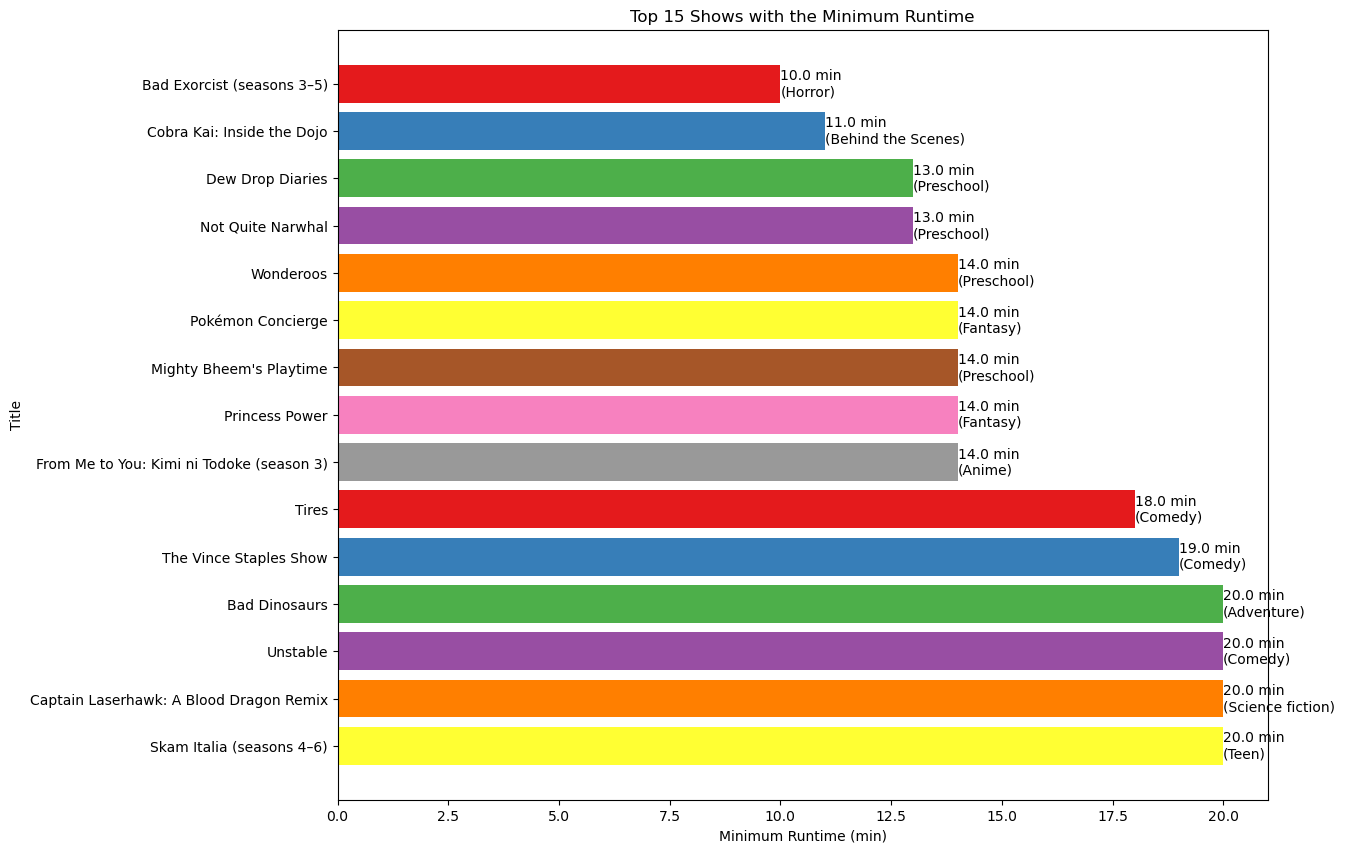

In [42]:
# Convert 'Runtime (min)' to numeric, forcing errors to NaN
df_runtime['Runtime_min (min)'] = pd.to_numeric(df_runtime['Runtime_min (min)'], errors='coerce')

# Drop rows with NaN values in 'Runtime (min)'
df_runtime = df_runtime.dropna(subset=['Runtime_min (min)'])

# Sort by 'Runtime (min)' in ascending order
sorted_df = df_runtime.sort_values(by='Runtime_min (min)', ascending=True)

# Select the top 15 rows with the minimum runtime
top_15_min = sorted_df.head(15)

# Plot the data
plt.figure(figsize=(12, 10))
colors = sns.color_palette('Set1')[0:16]
bars = plt.barh(top_15_min['Title'], top_15_min['Runtime_min (min)'], color=colors)

# Annotate each bar with the runtime and genre information
for bar, genre in zip(bars, top_15_min['Genre_Group']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()} min\n({genre})', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Minimum Runtime (min)')
plt.ylabel('Title')
plt.title('Top 15 Shows with the Minimum Runtime')

plt.gca().invert_yaxis()
plt.show()

The top 15 shows with the shortest runtimes, ranging from 10 to 20 minutes, span a wide array of genres including preschool content, comedy, fantasy, and science fiction. This diversity highlights the versatility of short-form content and its appeal to various audiences. Short runtimes are effectively used across different genres to cater to both younger and older viewers, providing insights into contemporary content trends and viewer preferences

C:\Users\Alda\AppData\Local\Temp\ipykernel_16076\2352221766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runtime['Runtime_max (min)'] = pd.to_numeric(df_runtime['Runtime_max (min)'], errors='coerce')


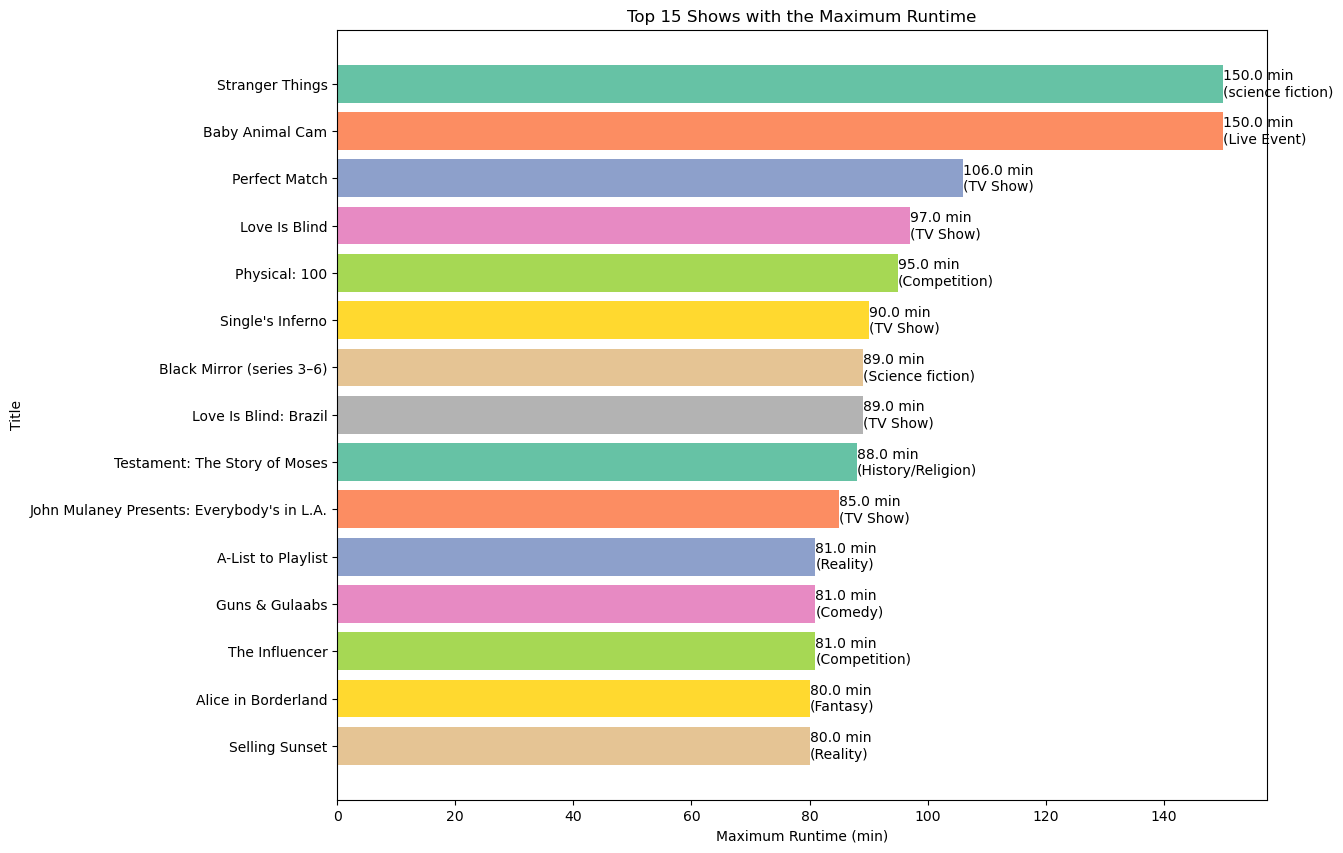

In [43]:
# Convert 'Runtime_max (min)' to numeric, forcing errors to NaN
df_runtime['Runtime_max (min)'] = pd.to_numeric(df_runtime['Runtime_max (min)'], errors='coerce')

# Drop rows with NaN values in 'Runtime_max (min)'
df_runtime = df_runtime.dropna(subset=['Runtime_max (min)'])

# Sort by 'Runtime_max (min)' in ascending order
sorted_df = df_runtime.sort_values(by='Runtime_max (min)', ascending=False)

# Select the top 15 rows with the maximum runtime
top_15_max = sorted_df.head(15)

# Plot the data
plt.figure(figsize=(12, 10))
colors = sns.color_palette('Set2')[0:16]
bars = plt.barh(top_15_max['Title'], top_15_max['Runtime_max (min)'], color=colors)

# Annotate each bar with the runtime and genre information
for bar, genre in zip(bars, top_15_max['Genre_Group']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width()} min\n({genre})', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Maximum Runtime (min)')
plt.ylabel('Title')
plt.title('Top 15 Shows with the Maximum Runtime')

# Display the plot
plt.gca().invert_yaxis()  # Optional: To display the show with the smallest runtime at the top
plt.show()

We can notice that the most programming with maximum runtime are Reality shows, i.e. competitions, datings, Live events... 

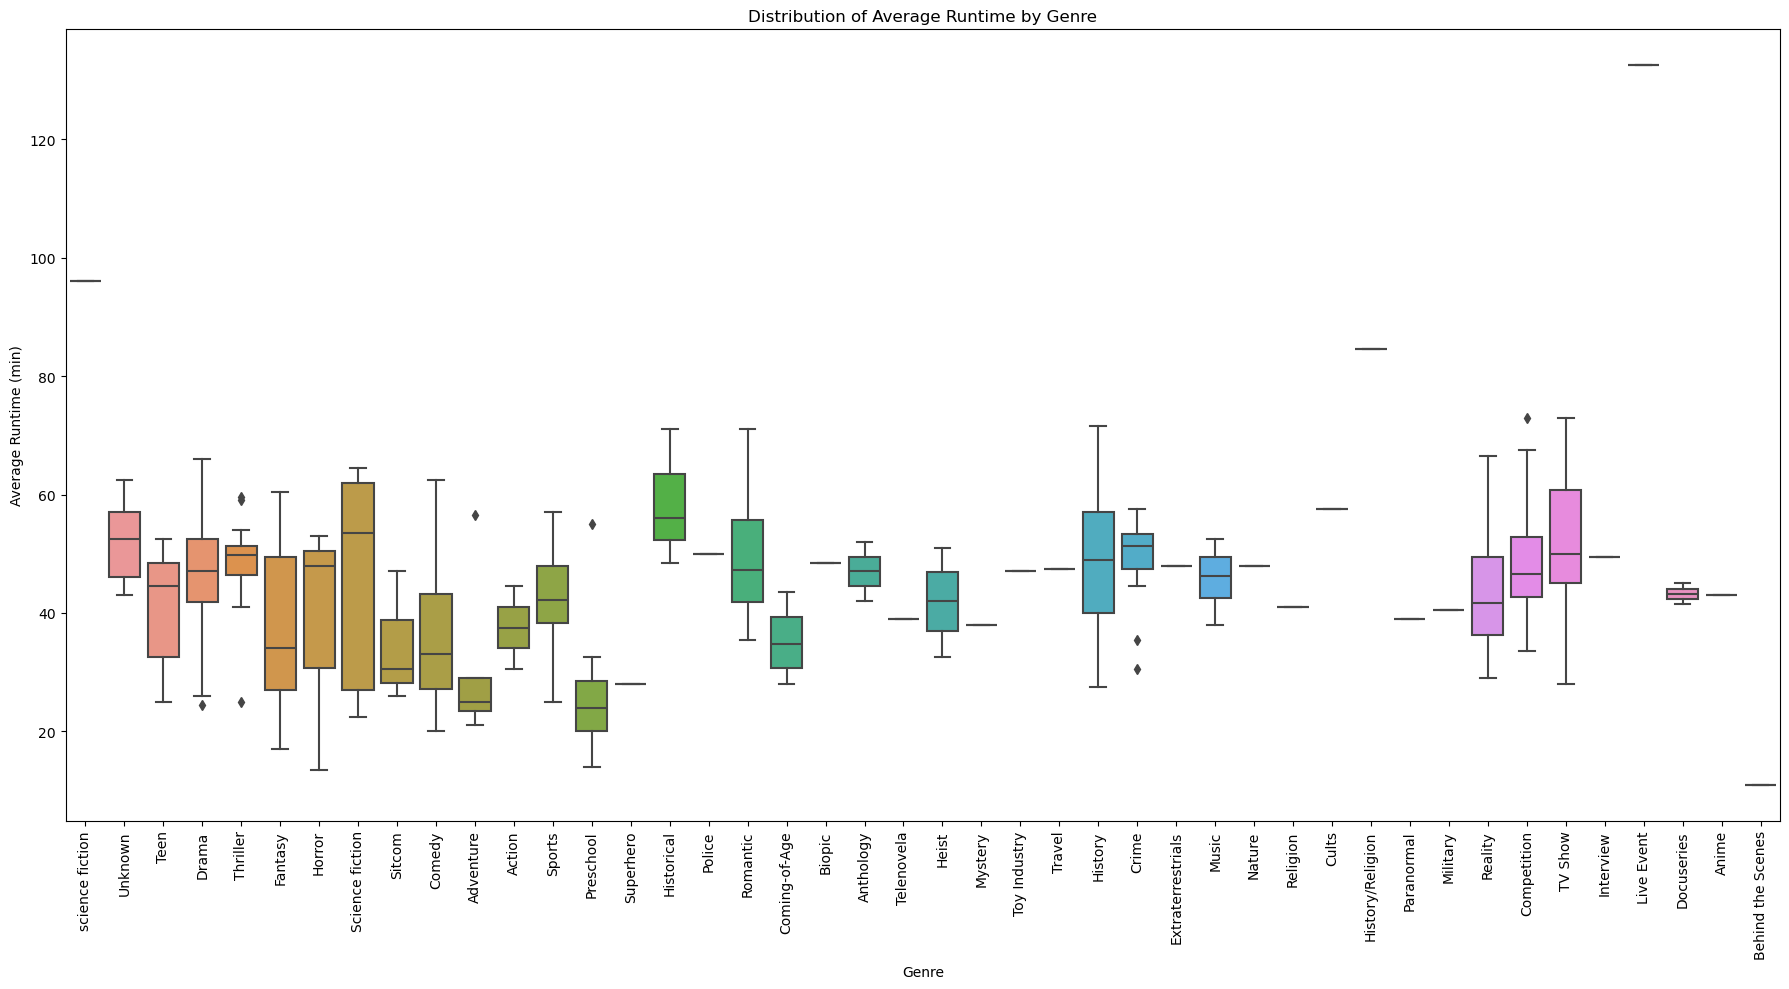

In [44]:
# Plot Average Runtime by Genre_Group
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_runtime, x='Genre_Group', y='Average_Runtime (min)')
plt.title('Distribution of Average Runtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (min)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

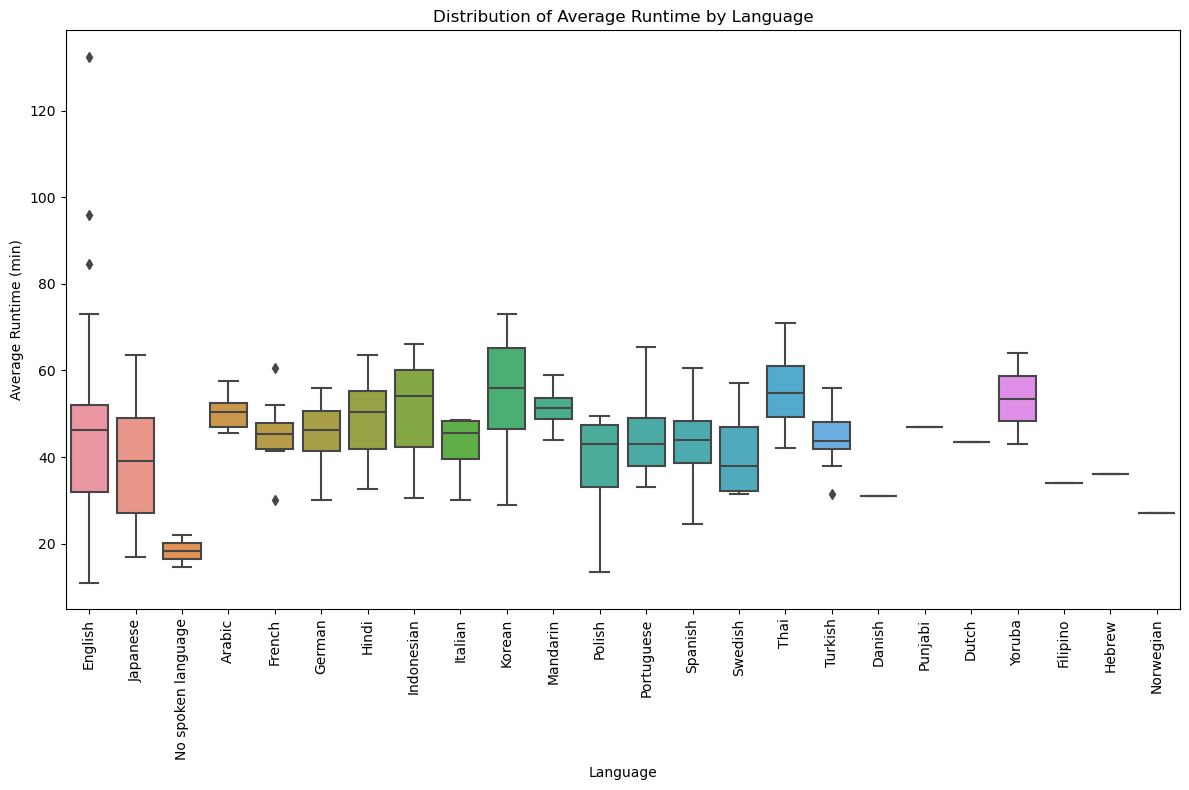

In [45]:
# Plot Average Runtime by Language
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_runtime, x='Language', y='Average_Runtime (min)')
plt.title('Distribution of Average Runtime by Language')
plt.xlabel('Language')
plt.ylabel('Average Runtime (min)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Now let's focus on Upcoming programmings

##### What are the top 10 genres of upcoming shows?

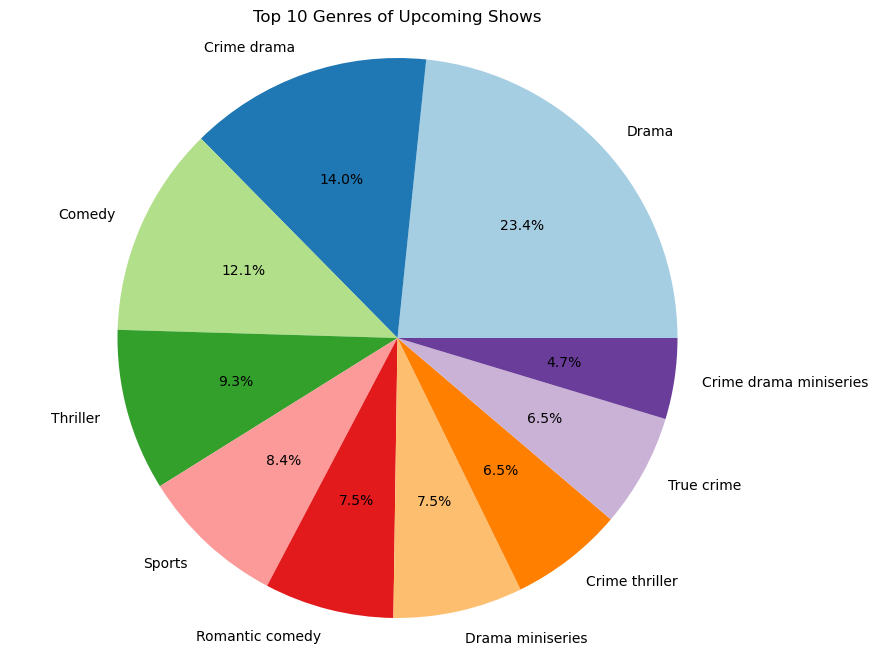

In [46]:
# Filter the DataFrame to include only shows with status 'Upcoming'
upcoming_shows_df = df[df['Status'] == 'Upcoming']

# Extract the 'Genre' column
genres_upcoming_shows = upcoming_shows_df['Genre'].value_counts()

# Select the top 10 genres
top_10_genres_upc = genres_upcoming_shows.head(10)

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_genres_upc, labels=top_10_genres_upc.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_10_genres_upc))))
plt.title('Top 10 Genres of Upcoming Shows')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

The top 10 genres of upcoming shows reflect a strong emphasis on drama(23.4%), with notable representation from crime dramas(14%), comedies(12.1%), and thrillers(9.3%).

#### What are the top 5 Languages of upcoming shows ?

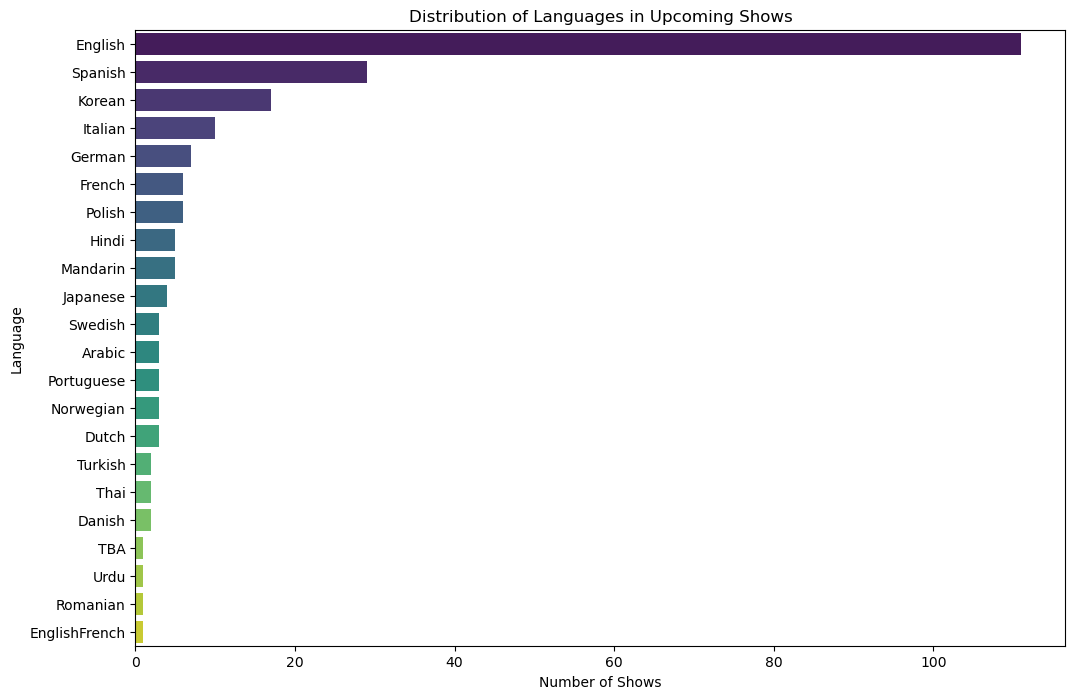

In [47]:
# Filter upcoming shows
upcoming_shows = df[df['Status'].str.contains('Upcoming', na=False)]

# Plot distribution of languages for upcoming shows
plt.figure(figsize=(12, 8))
sns.countplot(data=upcoming_shows, y='Language', order=upcoming_shows['Language'].value_counts().index, palette='viridis')
plt.title('Distribution of Languages in Upcoming Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Language')
plt.show()

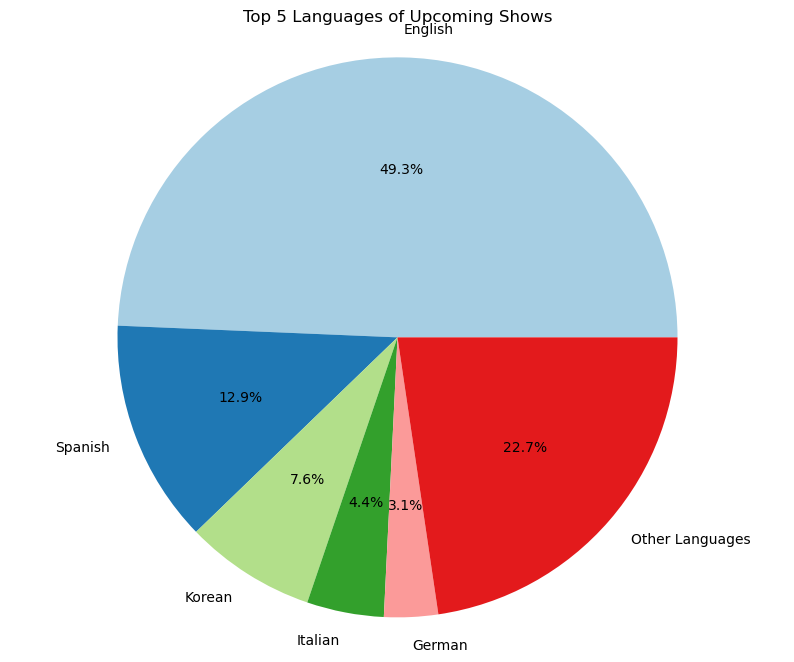

In [48]:
# Filter the DataFrame to include only shows with status 'Upcoming'
upcoming_shows_df = df[df['Status'] == 'Upcoming']

# Count the occurrences of each language
language_counts = upcoming_shows_df['Language'].value_counts()

# Select the top 5 languages and combine the rest into 'Other Languages'
top_5_languages = language_counts.head(5)
other_languages = language_counts.sum() - top_5_languages.sum()
top_5_languages['Other Languages'] = other_languages

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_5_languages, labels=top_5_languages.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_5_languages))))
plt.title('Top 5 Languages of Upcoming Shows')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Now let's focus on the programmings in development

##### What are the top 10 genres of shows in development?

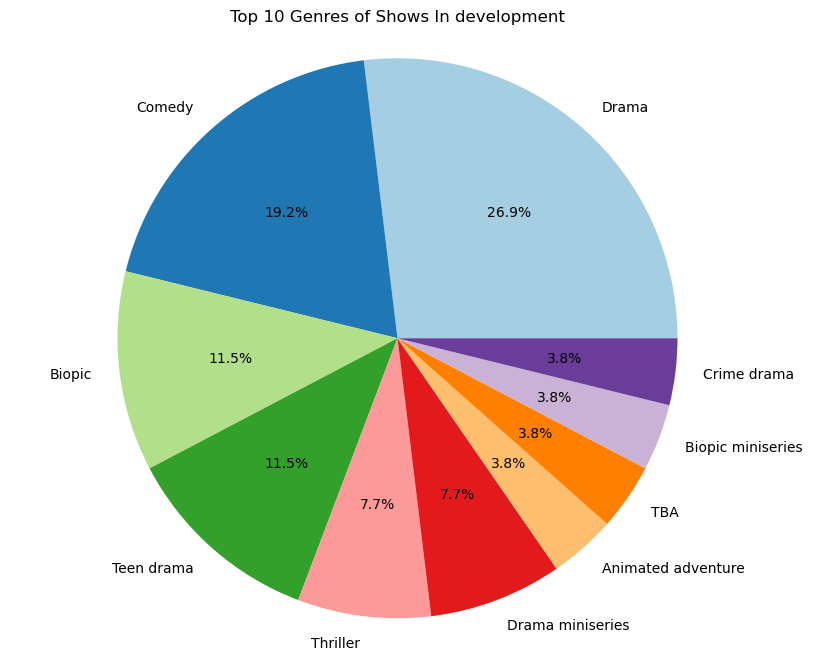

In [49]:
# Filter the DataFrame to include only shows with status 'Upcoming'
indevel_shows_df = df[df['Status'] == 'In development']

# Extract the 'Genre' column
genres_indevel_shows = indevel_shows_df['Genre'].value_counts()

# Select the top 10 genres
top_10_genres = genres_indevel_shows.head(10)

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_10_genres))))
plt.title('Top 10 Genres of Shows In development')
plt.axis('equal') 
plt.show()

The top 10 genres of shows in development reflect a strong emphasis on drama again (26.9%)

We noticed that there is a clear focus on drama content and we also notice that English remains the primary language for shows but other languages like Spanish and Korean are gaining prominence.

In [50]:
streamlit_df = df

In [51]:
streamlit_df

,Title,Genre,Premiere,Seasons&Total episodes,Runtime,Status,Language,Release_year,Total episodes,Seasons,Runtime_min (min),Runtime_max (min),Average_Runtime (min),Genre_Group
0,Stranger Things,Science fiction horror,"July 15, 2016","4 seasons, 34 episodes",42–150 min,Final season due to premiere in 2025,English,2016,34,4,42.0,150.0,96.0,science fiction
1,Virgin River,Romantic drama,"December 6, 2019","5 seasons, 54 episodes",39–52 min,Season 6 due to premiere in 2025,English,2019,54,5,39.0,52.0,45.5,Unknown
2,The Witcher,Fantasy drama,"December 20, 2019","3 seasons, 24 episodes",47–67 min,Renewed for seasons 4–5 (final),English,2019,24,3,47.0,67.0,57.0,Unknown
3,Outer Banks,Coming-of-age drama,"April 15, 2020","3 seasons, 30 episodes",42–79 min,"Season 4 part 1 due to premiere on October 10,...",English,2020,30,3,42.0,79.0,60.5,Unknown
4,Sweet Magnolias,Romantic drama,"May 19, 2020","3 seasons, 30 episodes",43–54 min,Season 4 due to premiere in 2025,English,2020,30,3,43.0,54.0,48.5,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,Untitled spiritual procedural series,Crime procedural/Supernatural,Unknown,Unknown,Unknown,In development,English,<NA>,<NA>,<NA>,NaN,Unknown,Unknown,Supernatural
629,Untitled Stranger Things spin-off series,Science fiction drama,Unknown,Unknown,Unknown,In development,English,<NA>,<NA>,<NA>,NaN,Unknown,Unknown,science fiction
630,Untitled U2 biopic series,Biopic,Unknown,Unknown,Unknown,In development,English,<NA>,<NA>,<NA>,NaN,Unknown,Unknown,Biopic
631,Untitled Virgin River prequel,Romantic drama,Unknown,Unknown,Unknown,In development,English,<NA>,<NA>,<NA>,NaN,Unknown,Unknown,Unknown


In [138]:
streamlit_df.to_csv('streamlit_data.csv', index=False)

In [ ]:
df